## IMPORTS

In [1]:
import matplotlib.pyplot as plt
import utils
import K_means as KM

## DEFINIR PATH DE DATOS

In [2]:
IMG_PATH ='data/'

## CARGAR DATOS

In [3]:
data = utils.get_data(IMG_PATH)

## FUNCION DE ERROR

In [4]:
def WSS(centroids , pixels, distance):
    """
    WSS

    :param centroids: Lista de centroides
    :param pixels: Matriz de pixeles
    :param distance: Funcion de distancia
    :Return: Error total interno del cluster
    """
    Error = 0
    for i in range(len(pixels)):
        centroid_id = pixels.iloc[i]['cluster']
        Error += distance(pixels.iloc[i][['R','G','B']], centroids[centroid_id])
    return round(Error,2)

## GENERAR ELBOW METHOD

In [5]:
def generate_elbow(K_max):
    """
    generate_elbow

    :param K_max: Maxima cantidad de centroides computados
    :Return: Error total interno del modelo por cada cantidad de centroides
    """    
    K_iter= 1
    K_values = []
    Error_values = []
    while K_iter <= K_max:
        K_means = KM.K_Means(n=K_iter, cc=KM.plus_plus)
        centroids, clusters = K_means.execute(data[1][1][['R','G','B']])
        iter_item = data[1][1].copy()
        iter_item['cluster'] = clusters['cluster']
        K_values.append(K_iter)
        Error_values.append(WSS(centroids,iter_item,K_means.d))
        K_iter += 1
    return K_values, Error_values

## Llamado de la función

In [6]:
K_values, Error_values = generate_elbow(7)

## Plot de Elbow Method

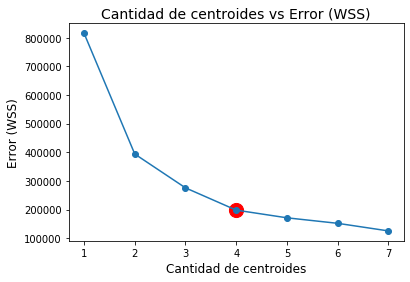

In [7]:
plt.plot(K_values,Error_values,marker='o')
plt.scatter(K_values[3],Error_values[3],s=200,c='r')
plt.title('Cantidad de centroides vs Error (WSS)',fontsize=14)
plt.xlabel('Cantidad de centroides',fontsize=12)
plt.ylabel('Error (WSS)',fontsize=12)
plt.savefig('Elbow_K_means.png', bbox_inches='tight')